# check SNR for LBG

In [2]:
#import yaw
import numpy as np
from astropy.io import fits
import pylab as pl
#from yaw.correlation import autocorrelate_scalar, crosscorrelate_scalar
import healpy as hp

In [3]:
root = "/pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/yaw-10bin-LBG_nz/"
w_sp = np.loadtxt(root + "w_sp-LyCAN_noSNRcut-thetasplit-min-1-max-50.txt")

In [18]:
Ntheta=15
Nbins=10
njn = 64
w_sp_mean = np.mean(w_sp,axis=0)
w_sp_mean = w_sp_mean.reshape((Ntheta,Nbins))

w_sp_std = np.std(w_sp,axis=0)*np.sqrt(njn)
w_sp_std = w_sp_std.reshape((Ntheta,Nbins))

In [15]:
z_edges = np.linspace(2,3,Nbins+1)
theta_edges = np.logspace(np.log10(1), np.log10(50), Ntheta+1)

In [16]:
z_cen = (z_edges[1:] + z_edges[:-1])/2
theta_cen = (theta_edges[1:] + theta_edges[:-1])/2

In [29]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = pl.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

Text(0, 0.5, 'SNR')

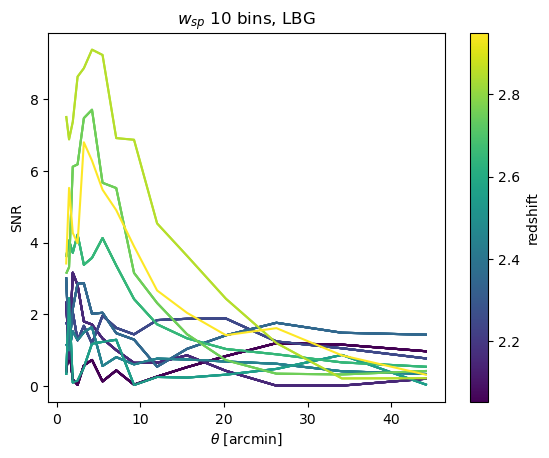

In [31]:
# plot SNR for each measurement below:
pl.title("$w_{sp}$ 10 bins, LBG")
pl.xlabel("$\\theta$ [arcmin]")
# pick some redshifts to inspect:
n=10
colors = pl.cm.jet(np.linspace(0,1,n))
xs = []
ys = []
c = z_cen
for ii in range(len(z_cen)):
    xs.append(theta_cen)
    ys.append(abs(w_sp_mean[:,ii]/w_sp_std[:,ii]))

    lc=multiline(xs, ys, c)
#plt.plot(theta_1_50_bincen + tick*0.02, , color=colors[ii])
pl.colorbar(lc, label="redshift")
pl.ylabel("SNR")

Text(0, 0.5, 'w_sp')

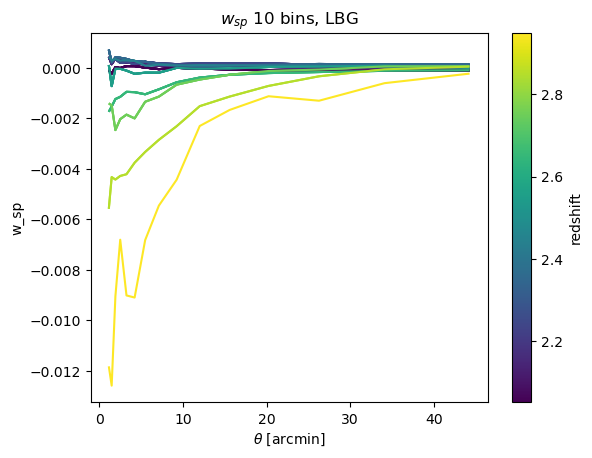

In [32]:
# plot SNR for each measurement below:
pl.title("$w_{sp}$ 10 bins, LBG")
pl.xlabel("$\\theta$ [arcmin]")
# pick some redshifts to inspect:
n=10
colors = pl.cm.jet(np.linspace(0,1,n))
xs = []
ys = []
c = z_cen
for ii in range(len(z_cen)):
    xs.append(theta_cen)
    ys.append(w_sp_mean[:,ii])

    lc=multiline(xs, ys, c)
#plt.plot(theta_1_50_bincen + tick*0.02, , color=colors[ii])
pl.colorbar(lc, label="redshift")
pl.ylabel("w_sp")

In [39]:
# let's combine the thetas and look at SNR:

def get_w_comb(w_thetasplit, njn, Ntheta, Nbins, thetas, alpha, theta_mask):
    # do the selection:
    mask_min = theta_mask[0]
    mask_max = theta_mask[1]
    selind = np.where((thetas>=mask_min)&(thetas<=mask_max))[0][:-1]
        
    Theta_bincen = (thetas[1:] + thetas[:-1])/2.
    dTheta=np.array([thetas[i+1]-thetas[i] for i in range(Ntheta)])
    
    w_comb_jk = np.zeros((njn,Nbins))
    for jk in range(njn):
        data_to_get = w_thetasplit[jk, :].reshape((Ntheta,Nbins))
        for ii in range(Nbins):
            denom = sum(Theta_bincen**alpha*dTheta)
            w_comb_jk[jk, ii] = sum(data_to_get[selind,ii]*Theta_bincen[selind]**alpha*dTheta[selind])/denom
    mean = np.mean(w_comb_jk, axis=0)
    std = np.std(w_comb_jk, axis=0)*np.sqrt(njn)
    w_comb = np.c_[mean,std]
    w_comb = np.c_[w_comb, w_comb_jk.T]
    
    return w_comb

In [47]:
alpha=0
theta_mask = [10,30]
w_sp_comb = get_w_comb(w_sp, njn, Ntheta, Nbins, theta_edges, alpha, theta_mask)

In [43]:
# also load the z distirbution of the sample:
nz = np.loadtxt("/pscratch/sd/q/qhang/desi-lya/results-newbias/run-0/catalogue/nz-unknown-LBG_nz-zmin-0-zmax-3.txt")

<ErrorbarContainer object of 3 artists>

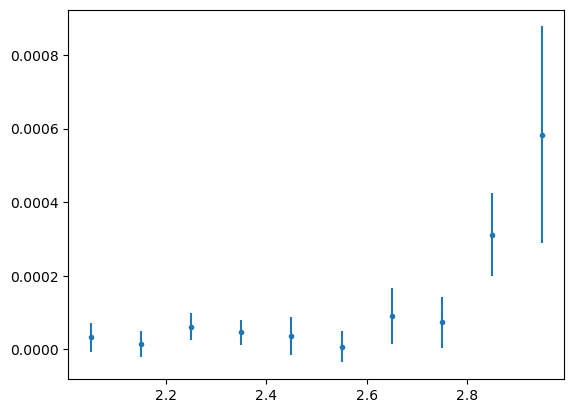

In [50]:
pl.errorbar(z_cen, abs(w_sp_comb[:,0]), yerr=w_sp_comb[:,1], fmt='.')

(2.0, 3.0)

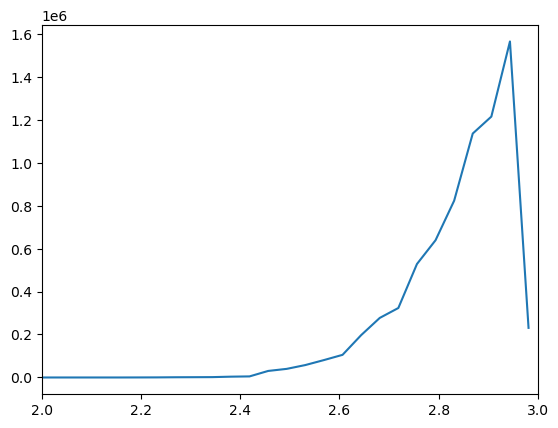

In [46]:
pl.plot(nz[:,0], nz[:,1])
pl.xlim([2,3])